# drinks 데이터셋의 기초 정보 출력하기

In [14]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drinks = pd.read_csv('./data/drinks.csv')
print(drinks.info())
drinks.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [15]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


# 두 피처 간의 상관 계수 구하기

In [16]:
# beer_sercings, wine_servings 두 피처 간의 상관 계수를 계산
# pearson은 상관 계수를 구하는 계산 방법 중 하나를 의미, 가장 널리 쓰이는 방법.

drinks[['beer_servings','wine_servings']].corr(method = 'pearson')

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [26]:
cols = ['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method='pearson')
print(corr.values)

[[1.         0.45881887 0.52717169 0.83583863]
 [0.45881887 1.         0.19479705 0.65496818]
 [0.52717169 0.19479705 1.         0.66759834]
 [0.83583863 0.65496818 0.66759834 1.        ]]


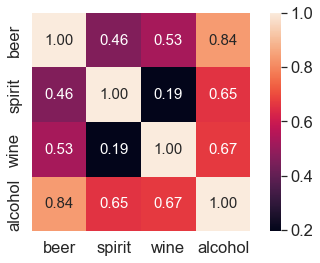

In [29]:
import seaborn as sns

# corr 행렬 히트맵을 시각화합니다.
# 그래프 출력을 위한 cols 이름을 축약합니다.
cols_view = ['beer','spirit','wine','alcohol']
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
                cbar = True,  # 오른쪽 바
                annot = True, # 안에 숫자
                square = True,# 정사각형으로 만들 것인지
                fmt = '.2f',  # 소수점 2자리
                annot_kws = {'size': 15},
                yticklabels = cols_view,
                xticklabels = cols_view)

plt.tight_layout()
plt.show()

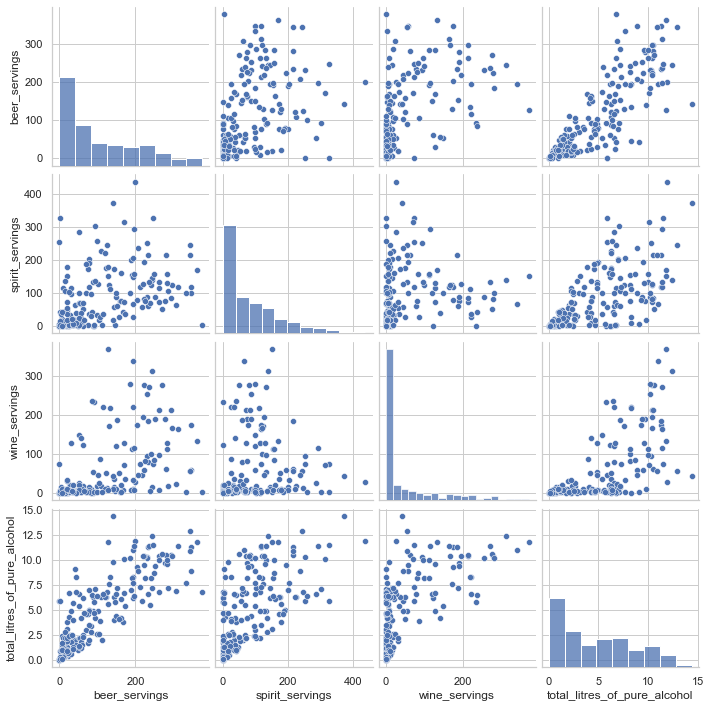

In [25]:
# 시각화 라이브러리를 이용한 피처 간의 산점도 그래프를 출력
sns.set(style = 'whitegrid', context = 'notebook')
sns.pairplot(drinks[['beer_servings','spirit_servings',
                    'wine_servings','total_litres_of_pure_alcohol']], height = 2.5)
plt.show()

# 결측 데이터 전처리하기

In [30]:
# 결측 데이터를 처리: 기타 대륙으로 통합 -> 'OT'
drinks['continent'] = drinks['continent'].fillna('OT')
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


# 파이차트로 시각화하기

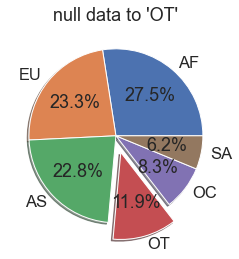

In [35]:
labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().tolist()
explode = (0, 0, 0, 0.2, 0, 0)

plt.pie(fracs1, explode=explode, labels=labels, autopct='%.1f%%',shadow=True)
plt.title('null data to \'OT\'')
plt.show()          

# agg()함수를 이용해 대륙별로 분석하기

In [40]:
# 대륙별 spirit_sercings의 평균, 최소, 최대, 합계를 계산
result = drinks.groupby('continent').spirit_servings.agg(['mean','min','max','sum'])
# drinks.groupby('continent').spirit_servings.mean()

In [43]:
# 전체 평균보다 많은 알코올을 섭취하는 대륙 구하기
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean = continent_mean[continent_mean >= total_mean]
print(continent_over_mean)
print(total_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64
4.717098445595855


In [44]:
# 평균 beer_servings가 가장 높은 대륙 구하기
beer_continent = drinks.groupby('continent').beer_servings.mean().idxmax()
print(beer_continent)

EU


# 분석 결과 시각화하기

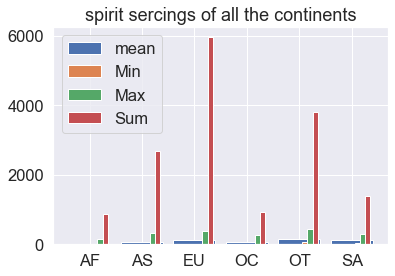

In [52]:
# 대륙별 spirit_servings의 평균, 최고, 합게를 시각화 함
n_continent = len(result.index)
continent = result.index.tolist()
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

index = np.arange(n_continent)
bar_width = 0.1

plt.bar(index, means, label='mean')
plt.bar(index + bar_width, mins, bar_width, label='Min')
plt.bar(index + bar_width * 2, maxs, bar_width, label='Max')
plt.bar(index + bar_width * 3, sums, bar_width, label='Sum')
plt.legend()
plt.xticks(index, continent)
plt.title('spirit sercings of all the continents')
plt.show()

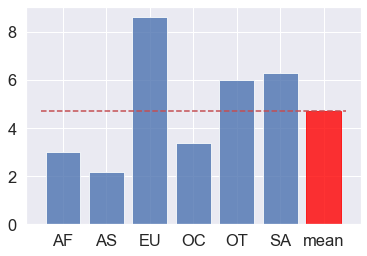

In [58]:
# 대륙별 total_litres_of_pure_alcohol을 시각화
continents = continent_mean.index.tolist()
continents.append('mean')
index = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)

bars = plt.bar(index, alcohol, alpha=0.8)
bars[len(continents)-1].set_color('red')
plt.plot([0-0.5, 6.5], [total_mean, total_mean], 'r--')
plt.xticks(index, continents)
plt.show()

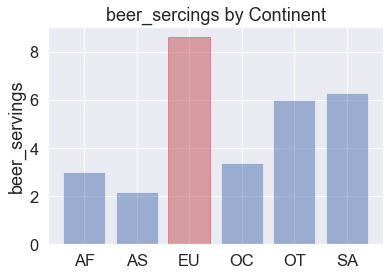

In [60]:
# 대륙별 beer_servings를 시각화
beer_group = drinks.groupby('continent')['beer_servings'].sum()
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()

bar_list = plt.bar(y_pos, alcohol, align='center', alpha=0.5)
bar_list[continents.index('EU')].set_color('r')
plt.xticks(y_pos, continents)
plt.ylabel('beer_servings')
plt.title('beer_sercings by Continent')
plt.show()